In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

criminal_test.csv
criminal_train.csv



In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import lightgbm as lgb
from sklearn.svm import SVC
import matplotlib.pylab as plt
import matplotlib.pyplot as plote
from sklearn import preprocessing
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
dataset =pd.read_csv('../input/criminal_train.csv')

In [5]:
# The first 5 rows of dataset
dataset.head(5)

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [6]:
# feature scaling
dataset.VESTR = preprocessing.scale(dataset.VESTR)
dataset.ANALWT_C = preprocessing.scale(dataset.ANALWT_C)

# separating dependent and independent variable
# dropping IDs
target = dataset.Criminal
features = dataset.drop(['Criminal','PERID'], axis = 1)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


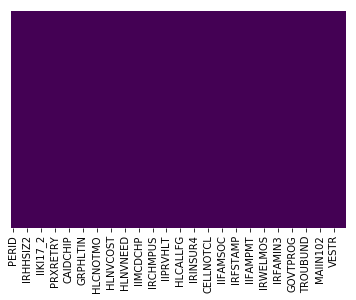

In [7]:
#this plot is used to show whether there is null value or not 

sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#this is used to show the all the column infornation
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 72 columns):
PERID        45718 non-null int64
IFATHER      45718 non-null int64
NRCH17_2     45718 non-null int64
IRHHSIZ2     45718 non-null int64
IIHHSIZ2     45718 non-null int64
IRKI17_2     45718 non-null int64
IIKI17_2     45718 non-null int64
IRHH65_2     45718 non-null int64
IIHH65_2     45718 non-null int64
PRXRETRY     45718 non-null int64
PRXYDATA     45718 non-null int64
MEDICARE     45718 non-null int64
CAIDCHIP     45718 non-null int64
CHAMPUS      45718 non-null int64
PRVHLTIN     45718 non-null int64
GRPHLTIN     45718 non-null int64
HLTINNOS     45718 non-null int64
HLCNOTYR     45718 non-null int64
HLCNOTMO     45718 non-null int64
HLCLAST      45718 non-null int64
HLLOSRSN     45718 non-null int64
HLNVCOST     45718 non-null int64
HLNVOFFR     45718 non-null int64
HLNVREF      45718 non-null int64
HLNVNEED     45718 non-null int64
HLNVSOR      45718 non-null int64
IRMCDCH

In [9]:
# this command is used to show the statical ananlysis of the dataset
dataset.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,4.571800e+04,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,...,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,4.571800e+04,4.571800e+04,45718.000000,45718.000000
mean,5.445446e+07,3.355549,0.476486,3.426375,1.001706,2.084124,1.007437,1.162606,1.011024,97.394943,...,2.219410,2.234940,1.646135,1.764666,1.978936,1.978739,1.152089e-16,-7.237736e-15,1.493854,0.069447
std,2.553911e+07,1.176651,0.888472,1.427420,0.061314,1.102988,0.123162,0.469029,0.146444,12.355156,...,5.295784,5.293651,0.618403,0.771411,0.144510,0.145161,1.000011e+00,1.000011e+00,0.500230,0.254216
min,1.000222e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-8.199112e-01,-1.509584e+02,-1.000000,0.000000
25%,3.233189e+07,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,-6.009619e-01,-4.050395e-02,1.000000,0.000000
50%,5.411043e+07,4.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,-3.447100e-01,4.755577e-03,1.000000,0.000000
75%,7.612731e+07,4.000000,1.000000,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.874629e-01,5.755836e-02,2.000000,0.000000
max,9.999956e+07,4.000000,3.000000,6.000000,3.000000,4.000000,3.000000,3.000000,3.000000,99.000000,...,98.000000,98.000000,3.000000,3.000000,2.000000,2.000000,1.823848e+01,9.904626e-02,2.000000,1.000000


**CountPlot of dependent variable**

Text(0.5,1,'Criminal Count')

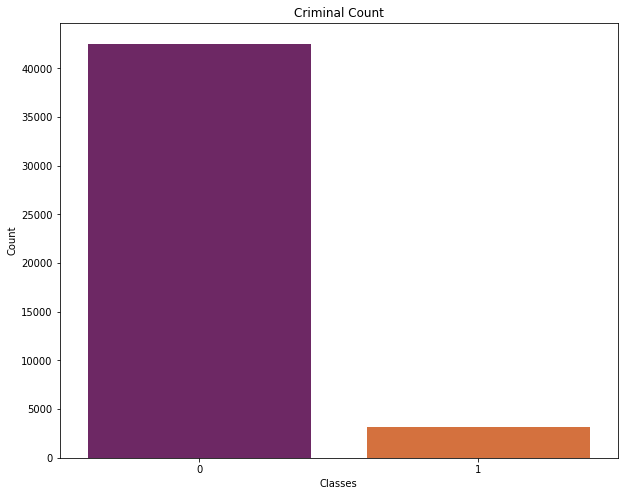

In [10]:
ax=plote.figure(figsize=(10,8))
ax=sns.countplot(x="Criminal",palette="inferno",data=dataset)
ax.set_xlabel("Classes")
ax.set_ylabel("Count")
ax.set_title("Criminal Count")

**Plotting Feature importance For XGBoost Classifier
Ranking the features according to their importance in classification in XGB.**

In [11]:
xgb = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.7,
 colsample_bytree=0.6,
 reg_aplha=1.68,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb = xgb.fit(features, target)

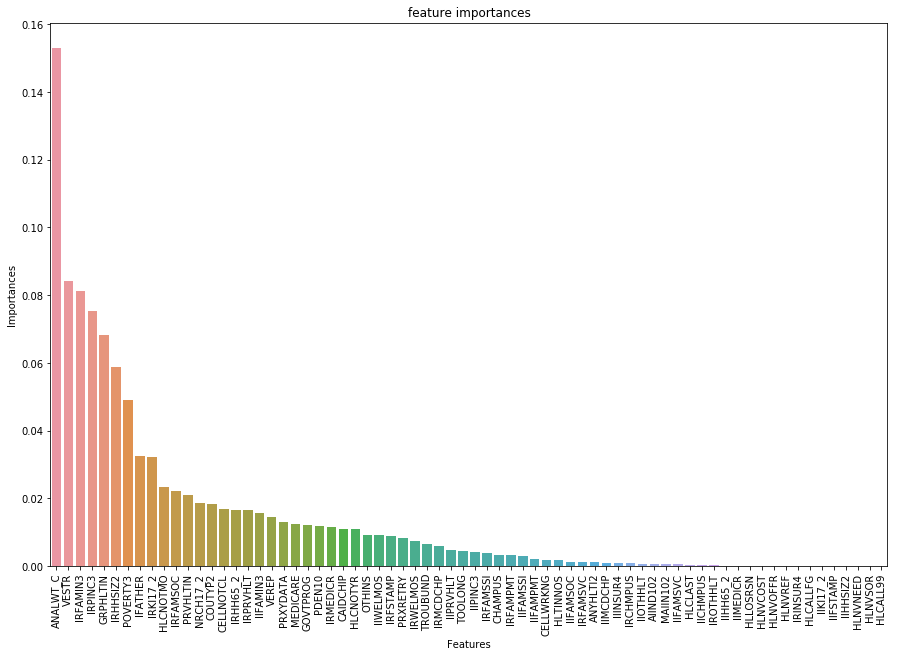

In [12]:
importances = xgb.feature_importances_
feature_names = features.columns.values
data = pd.DataFrame({'features': feature_names,'importances':importances})
new_index = (data['importances'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
plt.figure(figsize=(15,10))
ax= sns.barplot(x=sorted_data['features'], y=sorted_data['importances'])
plt.xticks(rotation= 90)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('feature importances')
plt.show()

**The importance of various features are shown. We selecting the top features according to the above importance graph**
 

In [13]:
optimal_features_xgb = ['IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IRKI17_2', 'IRHH65_2', 'PRXYDATA', 'MEDICARE', 'CAIDCHIP', \
            'GRPHLTIN', 'HLCNOTMO', 'IRMCDCHP', 'OTHINS', 'CELLNOTCL', 'IRFAMSOC', 'IRFSTAMP', 'IRWELMOS',\
            'IRPINC3', 'IRFAMIN3', 'IIFAMIN3', 'GOVTPROG', 'POVERTY3', 'TOOLONG', 'TROUBUND', 'PDEN10',\
            'COUTYP2', 'ANALWT_C', 'VESTR', 'VEREP', 'PRVHLTIN', 'IRPRVHLT', 'IRMEDICR', 'IIWELMOS']


**Plotting Feature importances for Linear SVM**

In [14]:
svm = SVC(kernel='linear', C=4)
svm.fit(features, target)
  

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

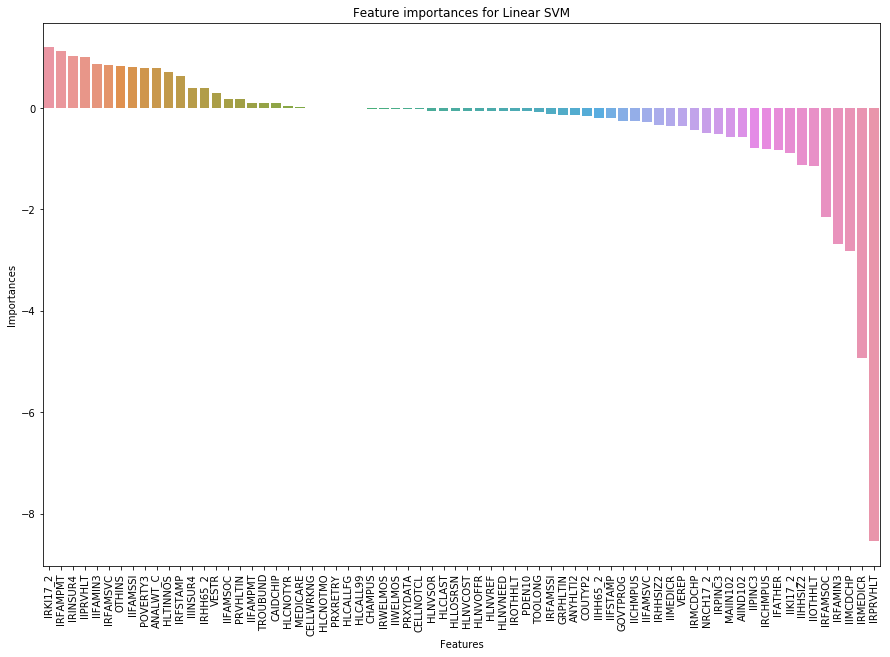

In [15]:
importances = svm.coef_
features_names = features.columns.values
data = pd.DataFrame({'features': feature_names,'importances':importances[0]})
new_index = (data['importances'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
plt.figure(figsize=(15,10))
ax= sns.barplot(x=sorted_data['features'], y=sorted_data['importances'])
plt.xticks(rotation= 90)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('Feature importances for Linear SVM')
plt.show()

**The positive and negative values in the graph shows the role of feature in classifying positive and negative values. Therefore we select the extremities of the features for both the classes.**

In [16]:
optimal_features_LSVM = ['IRKI17_2', 'IRFAMPMT', 'IRINSUR4', 'IIPRVHLT', 'IIFAMIN3',
       'IRFAMSVC', 'OTHINS', 'IIFAMSSI','IFATHER', 'IIKI17_2', 'IIHHSIZ2','IIOTHHLT',\
        'IRFAMSOC', 'IRFAMIN3', 'IIMCDCHP', 'IRMEDICR','IRPRVHLT']

**Plotting Feature importance in LightGBM¶**

In [17]:
train_data=lgb.Dataset(features,label=target)
param = {'num_leaves':120,'max_depth':5,'learning_rate':.1,'max_bin':1200}
num_round=50
lgbm=lgb.train(param,train_data,num_round)

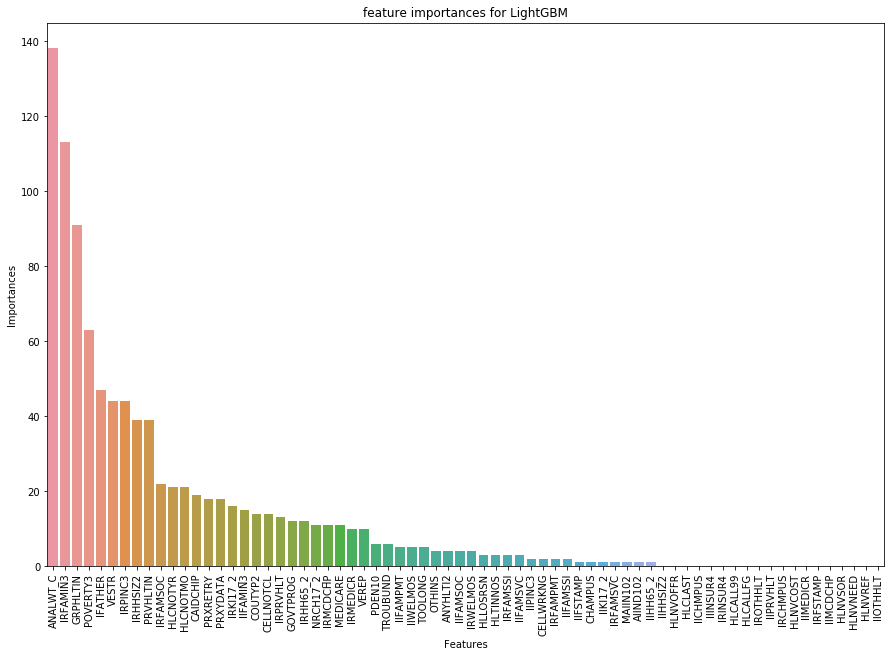

In [18]:
importances = lgbm.feature_importance(importance_type='split')
features_names = features.columns.values
data = pd.DataFrame({'features': feature_names,'importances':importances})
new_index = (data['importances'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
plt.figure(figsize=(15,10))
ax= sns.barplot(x=sorted_data['features'], y=sorted_data['importances'])
plt.xticks(rotation= 90)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('feature importances for LightGBM')
plt.show()

**We select features according to its importances as shown in the graph.**

In [19]:
optimal_features_LGBM = sorted_data[0:27].features.values

**XGBoost Classifier¶**
The features are filtered according to the importance derived from the feature importance graph of XGB

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features[optimal_features_xgb], target ,test_size=0.4, random_state=7)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test ,test_size=0.5, random_state=7)

In [21]:
xgb = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.7,
 colsample_bytree=0.6,
 reg_alpha=0.5,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


In [22]:
xgb = xgb.fit(X_train, y_train)
res_xgb = xgb.predict(X_test)
score_xgb = metrics.accuracy_score(res_xgb, y_test)
print("Accuracy : %.4g" % score_xgb)

Accuracy : 0.9561


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
# getting probability for test and cross validation
element_xgb = xgb.predict_proba(X_test)
elementcv_xgb = xgb.predict_proba(X_cv)

**kernel SVM
We follow the same features selected in XGBoost because SVM doesn't have a feature importance metric and including all features are inefficient due to the large amount of features.**

In [24]:
clf = SVC(kernel='rbf',C=4,probability=True)
clf.fit(X_train, y_train)
res_ksvm = clf.predict(X_test)
score_ksvm = metrics.accuracy_score(res_ksvm, y_test)
print("Accuracy : %.4g" % score_ksvm)

Accuracy : 0.9536


In [25]:
element_ksvm = clf.predict_proba(X_test)
elementcv_ksvm = clf.predict_proba(X_cv)

**LGBoost
The features are filtered according to the feature importance graph of LGBoost**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features[optimal_features_LGBM], target ,test_size=0.4, random_state=7)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test ,test_size=0.5, random_state=7)


In [27]:
train_data=lgb.Dataset(X_train,label=y_train)
param = {'num_leaves':120,'max_depth':5,'learning_rate':.1,'max_bin':1200}
num_round=50
lgbm=lgb.train(param,train_data,num_round)

In [28]:
ypred2=lgbm.predict(X_test)
res3 = (ypred2 >= .5).astype(int)
score_lgbm = metrics.accuracy_score(res3, y_test)
print("Accuracy : %.4g" % score_lgbm)

Accuracy : 0.9561


In [29]:
# for test set
temp = pd.DataFrame(np.zeros((len(ypred2), 1)))

for i in range(0,len(ypred2)):
    temp[0][i] = ypred2[i]
    
temp2 = 1-temp
para3 = pd.concat([temp2,temp], axis = 1)
element_lgb = para3.values

# for cv set
pred_cv = lgbm.predict(X_cv)
temp = pd.DataFrame(np.zeros((len(pred_cv), 1)))

for i in range(0,len(pred_cv)):
    temp[0][i] = pred_cv[i]
    
temp2 = 1-temp
para3 = pd.concat([temp2,temp], axis = 1)
elementcv_lgb = para3.values

Linear SVM¶

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features[optimal_features_LSVM], target ,test_size=0.4, random_state=7)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test ,test_size=0.5, random_state=7)

In [31]:
svm = SVC(kernel='linear', C=3)
svm.fit(X_train, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
res_svm = svm.predict(X_test)
score_lsvm = metrics.accuracy_score(res_svm, y_test)
print("Accuracy : %.4g" % score_lsvm)

Accuracy : 0.9373


**Neural Networks Keras¶**

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(features, target ,test_size=0.4, random_state=7)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test ,test_size=0.5, random_state=7)
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 70))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 20)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=70, units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/opt/conda/lib/python3.6/

Epoch 1/20
27430/27430 [==============================] - 7s 242us/step - loss: 0.2140 - acc: 0.9299
Epoch 2/20
27430/27430 [==============================] - 6s 216us/step - loss: 0.1612 - acc: 0.9303
Epoch 3/20
27430/27430 [==============================] - 6s 208us/step - loss: 0.1487 - acc: 0.9333
Epoch 4/20
27430/27430 [==============================] - 6s 218us/step - loss: 0.1456 - acc: 0.9330
Epoch 5/20
27430/27430 [==============================] - 5s 196us/step - loss: 0.1410 - acc: 0.9346
Epoch 6/20
27430/27430 [==============================] - 5s 193us/step - loss: 0.1394 - acc: 0.9361
Epoch 7/20
27430/27430 [==============================] - 5s 182us/step - loss: 0.1369 - acc: 0.9391
Epoch 8/20
27430/27430 [==============================] - 6s 203us/step - loss: 0.1351 - acc: 0.9396
Epoch 9/20
27430/27430 [==============================] - 6s 231us/step - loss: 0.1347 - acc: 0.9397
Epoch 10/20
27430/27430 [==============================] - 6s 215us/step - loss: 0.1335 - a

In [34]:
# for test set
pred_nn = classifier.predict(X_test)
res_nn = (pred_nn >= .5).astype(int)
score_nn = metrics.accuracy_score(res_nn, y_test)
print("Accuracy : %.4g" % score_nn)

Accuracy : 0.9447


In [35]:
# for test set
temp = pd.DataFrame(np.zeros((len(pred_nn), 1)))

for i in range(0,len(pred_nn)):
    temp[0][i] = pred_nn[i]
    
temp2 = 1-temp
para4 = pd.concat([temp2,temp], axis = 1)
element_nn = para4.values

# for cross validation set
pred_nn = classifier.predict(X_cv)
temp = pd.DataFrame(np.zeros((len(pred_nn), 1)))

for i in range(0,len(pred_nn)):
    temp[0][i] = pred_nn[i]
    
temp2 = 1-temp
para4 = pd.concat([temp2,temp], axis = 1)
elementcv_nn = para4.values

**Stacking**

The four most efficient algorithms are stacked to predict the final output. Each algorithm produces probabilties for each class(here 0 and 1). Mean of probabilties is calculated from all four algorithms and used to calculate output. In place of mean we can use two more concepts i.e. finding the most confident output by any algorithm for each test case (max of probabilty) or number of outputs for each class.

0.14300000000000002


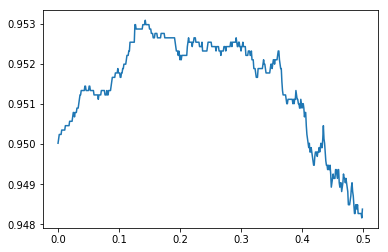

In [36]:
#para3 = para3.values
decide0 = pd.DataFrame(np.zeros((len(elementcv_nn), 4)))
decide1 = pd.DataFrame(np.zeros((len(elementcv_nn), 4)))
decide0 = decide0.values
decide1 = decide1.values
for i in range(0,len(decide0)):
    """decide0[i][0] = (1 if para1[i][0]>0.5 else 0)
    decide0[i][1] = (1 if para2[i][0]>0.5 else 0)
    decide0[i][2] = (1 if para31[i][0]>0.5 else 0)
    decide1[i][0] = (1 if para1[i][1]>0.5 else 0)
    decide1[i][1] = (1 if para2[i][1]>0.5 else 0)
    decide1[i][2] = (1 if para31[i][1]>0.5 else 0)""" 
    decide0[i][0] = elementcv_xgb[i][0]
    decide0[i][1] = elementcv_lgb[i][0]
    decide0[i][2] = elementcv_ksvm[i][0]
    decide0[i][3] = elementcv_nn[i][0]
    decide1[i][0] = elementcv_xgb[i][1]
    decide1[i][1] = elementcv_lgb[i][1]
    decide1[i][2] = elementcv_ksvm[i][1]
    decide1[i][3] = elementcv_nn[i][1]
k0 = decide0.mean(axis=1)
k1 = decide1.mean(axis=1)
def get_acc(thresh, k0=k0,k1=k1):
    final = pd.DataFrame(np.zeros((len(k0), 1)))
    for i in range(0,len(k0)):
        if (k0[i]-k1[i])>thresh:
            final[0][i]=0
        else:
            final[0][i]=1
    return metrics.accuracy_score(y_cv, final)
#print(get_acc(0.081))
t = np.arange(0.0, 0.5, 0.001)  
s = np.empty([500,1])
i=0
maxi = 0.0
iind = 0
for item in t:
    h = get_acc(item)
    s[i] = h
    if h>maxi:
        maxi = h
        iind = i
    i = i+1
print(iind*0.001)
plote.plot(t,s)
plote.show()

In [37]:
#para3 = para3.values
       
decide0 = pd.DataFrame(np.zeros((len(element_nn), 4)))
decide1 = pd.DataFrame(np.zeros((len(element_nn), 4)))
decide0 = decide0.values
decide1 = decide1.values
for i in range(0,len(decide0)):
    """decide0[i][0] = (1 if para1[i][0]>0.5 else 0)
    decide0[i][1] = (1 if para2[i][0]>0.5 else 0)
    decide0[i][2] = (1 if para31[i][0]>0.5 else 0)
    decide1[i][0] = (1 if para1[i][1]>0.5 else 0)
    decide1[i][1] = (1 if para2[i][1]>0.5 else 0)
    decide1[i][2] = (1 if para31[i][1]>0.5 else 0)""" 
    decide0[i][0] = element_xgb[i][0]
    decide0[i][1] = element_lgb[i][0]
    decide0[i][2] = element_ksvm[i][0]
    decide0[i][3] = element_nn[i][0]
    decide1[i][0] = element_xgb[i][1]
    decide1[i][1] = element_lgb[i][1]
    decide1[i][2] = element_ksvm[i][1]
    decide1[i][3] = element_nn[i][1]
k0 = decide0.mean(axis=1)
k1 = decide1.mean(axis=1)

"""final = pd.DataFrame(np.zeros((len(k0), 1)))
for i in range(0,9144):
    if (k0[i]-k1[i])>0.05:
       final[0][i]=0
    else:  
       final[0][i]=1
       
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, final))"""
def get_acc(thresh, k0=k0,k1=k1):
    final = pd.DataFrame(np.zeros((len(k0), 1)))
    for i in range(0,len(k0)):
        if (k0[i]-k1[i])>thresh:
            final[0][i]=0
        else:
            final[0][i]=1
    return metrics.accuracy_score(y_test, final)
print(get_acc(0.095))
t = np.arange(0.0, 0.5, 0.001)  
s = np.empty([500,1])
i=0
maxi = 0.0
iind = 0
for item in t:
    h = get_acc(item)
    s[i] = h
    if h>maxi:
        maxi = h
        iind = i
    i = i+1
print(maxi)
print(iind)

0.9546150481189851
0.9573490813648294
206


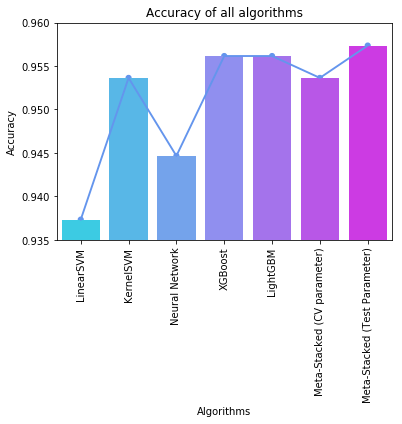

In [38]:
score_testcv = get_acc(0.059)
plt.figure()
x = np.array([score_lsvm,score_ksvm, score_nn,score_xgb,  score_lgbm, score_testcv, maxi])
y = np.array(['LinearSVM','KernelSVM','Neural Network','XGBoost', 'LightGBM', 'Meta-Stacked (CV parameter)', 'Meta-Stacked (Test Parameter)'])
dfx = pd.DataFrame(x)
colors = sns.color_palette("cool", len(x))
ax= sns.barplot(y, x, data=dfx,palette=colors)
ax = sns.pointplot(y, x, color='cornflowerblue', scale=0.7)
ax.set(ylim=(0.935, 0.96))
plt.title("Accuracy of all algorithms")
plt.xticks(rotation= 90)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
#adding the text labels
rects = ax.patches
labels = y

plt.show()